# Assignment 2 (Predictive Analytics with Python)
## Parth Patel, Quang Luong, Tuan Dang (CA2022)
### Part 1: Familiarizing and basic testing with the k-means algorithm
#### 1.1 Find some other interesting dataset than the Iris dataset from Kaggle on which you can perform kNN classification
We select the Unsupervised Learning on Country Datadataset from Kaggle:  
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
This dataset is in the public domain (licence CC0), and its usability is 10.00 by kaggle calculation. The dataset size is 10 kB.  
  
![alt text](./Country_dataset.jpg "Unsupervised Learning on Country Data - Kaggle")

In [1]:
# first, we import neccessary tools
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans # using sklearn as indicated
from matplotlib import pyplot as plt

After downloading the dataset, we save it in the same working folder with this ipynb file. The file name is Country-data.csv  
* *We read the file with the following code:*

In [2]:
# Get the country data dataframe (df) from the csv file
df=pd.read_csv("Country-data.csv", header=0)
# Display the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


*Observation: there are 167 row of data in the dataset and no missing data*  
*There are 10 column, country is the id, and other columns are the features (of types fload64 or int64)*  
* *Let's explore the meaning of the features, as provided in the data-dictionary.csv*

In [3]:
# read the csv file
data_dictionary=pd.read_csv('data-dictionary.csv', header=0)
# set the column width to read all content (not too long)
pd.set_option('max_colwidth', 120)
# display the data dictionary
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


* *Check if the countries are unique*

In [4]:
df['country'].nunique()

167

*There are 167 rows and 167 unique countries, so each country is unique*  
* *Now we display a summary of the dataset*

In [5]:
# Get summary of each numeric column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Let's apply the MinMaxScaler to ensure that each feature contributes equally to the distance computations.

In [6]:
# the features to scale (the 9 numeric columns)
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# call the MinMaxScaler
scaler = MinMaxScaler()
# scale the features all at once
df[features] = scaler.fit_transform(df[features])
# display the df with newly scaled features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,0.173661,0.196343,0.0,0.027507,0.081305,0.289679,1.0
exports,167.0,0.205112,0.137135,0.0,0.118520,0.174550,0.256345,1.0
health,167.0,0.311106,0.170717,0.0,0.193288,0.280298,0.422001,1.0
imports,167.0,0.269207,0.139188,0.0,0.173250,0.248566,0.337393,1.0
income,167.0,0.132933,0.154980,0.0,0.022076,0.075174,0.178397,1.0
inflation,167.0,0.110820,0.097687,0.0,0.055633,0.088716,0.138250,1.0
life_expec,167.0,0.758495,0.175408,0.0,0.654832,0.808679,0.881657,1.0
total_fer,167.0,0.283591,0.238777,0.0,0.101735,0.198738,0.430599,1.0
gdpp,167.0,0.121536,0.174944,0.0,0.010490,0.042274,0.131900,1.0


*Observation: now we can see that the min is 0 and max is 1 for all features*  
* *Let's create a dataframe of numeric columns only for further processing (drop the country)*

In [7]:
num_df=df.drop(['country'], axis=1, inplace=False)
num_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


* *Let's create a heatmap to see the correlation between the pairs of numeric features*

<Axes: >

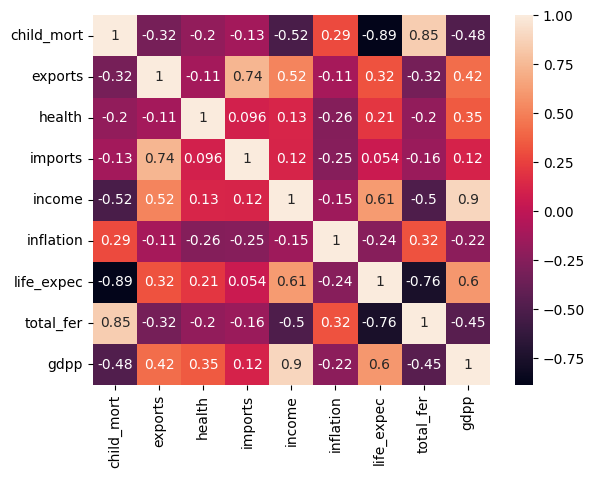

In [8]:
corr_matrix=num_df.corr()
sns.heatmap(corr_matrix,annot=True)

*Observation: High (positive) correlation:*  
* *gpdp and income (+ 0.9)*  
* *child_mort and total_fer (+0.85)*  
* *export and import (+ 0.74)*  

*High (negative) correlation:*  
* *child_mort and life_expec (-0.89)*  
* *life_expect and total_fer (-0.76)*  
#### 1.2 Run k-means algorithm on that data. We use the k-means sklearn version.

In [9]:
# Run K-means algorithm
# Let's start with 3 clusters
km3 = KMeans(n_clusters=3, n_init=10, random_state=0)
yp3 = km3.fit_predict(num_df)
yp3

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

#### 1.3 List 2 interesting use cases for applying k-means algorithm for real world. These may or may not be business cases.
#### *1.3.1	Market Segmentation:* 
Apply k-means clustering to segment countries based on similarities in features. The algorithm identifies clusters of countries with common characteristics, useful for businesses entering international markets.

#### *1.3.2 Human Development Index Classification:*
Use k-means clustering to categorize countries based on HDI-related features and focus development efforts. Targeted interventions in healthcare and education may be required for countries with low life expectancy and education levels, while economic development initiatives may benefit those in higher development clusters.

### Part 2 (Experimenting with the k-means algorithm more in detail)
#### 2.1 Make experiments on your algorithms with different values of k (k is n_clusters)
* *k = 2*

In [10]:
# Run K-means algorithm with different values of k
# Let's run with 2 clusters
km2 = KMeans(n_clusters=2, n_init=10, random_state=0)
yp2 = km2.fit_predict(num_df)
yp2

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

* *k = 5*

In [11]:
# Run K-means algorithm with different values of k
# Let's run with 5 clusters
km5 = KMeans(n_clusters=5, n_init=10, random_state=0)
yp5 = km5.fit_predict(num_df)
yp5

array([2, 4, 1, 2, 4, 4, 1, 3, 3, 1, 4, 4, 1, 4, 4, 3, 1, 2, 1, 1, 4, 1,
       4, 3, 4, 2, 2, 1, 2, 3, 1, 2, 2, 4, 1, 4, 2, 2, 2, 4, 2, 4, 4, 4,
       3, 1, 1, 1, 4, 2, 2, 4, 1, 3, 3, 1, 2, 4, 3, 2, 3, 1, 1, 2, 2, 1,
       2, 4, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 4, 4, 2,
       2, 1, 4, 0, 4, 2, 2, 4, 4, 2, 0, 2, 4, 4, 4, 1, 4, 1, 2, 1, 1, 1,
       3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 1, 4, 4, 3, 4, 1, 2, 1, 1, 2, 4, 4,
       2, 0, 4, 4, 1, 1, 4, 3, 1, 1, 2, 1, 3, 3, 1, 2, 4, 2, 2, 1, 4, 4,
       1, 2, 4, 3, 3, 3, 4, 1, 1, 1, 4, 2, 2])

#### 2.2 Utilize the Elbow method

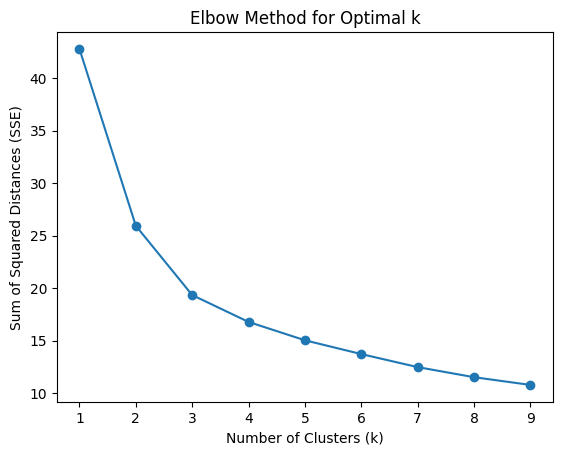

In [12]:
# finding the optimal k ('best k')
sse = [] # Create an empty list to store SSE values for different k values
k_rng = range(1, 10) # Define a range of k values from 1 to 9
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10, random_state=0) # Create a KMeans model with the current k value
    km.fit(num_df) # Fit the model to the data
    sse.append(km.inertia_) # Append the SSE value to the list

# Draw elbow graph: Plot SSE for different k values
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### 2.3 Think how is the situation now different from supervised learning (kNN) case
K-Means Clustering (Unsupervised Learning):  
Usage: Useful when you want to discover patterns or groupings in data without predefined categories.  

K-Nearest Neighbour’s (Supervised Learning):  
Usage: When you have labeled data, you can use similarity to known instances to predict or classify new instances.  

Key Differences:  
* K-Means: Unsupervised learning, doesn't require labeled data.  
* kNN: Supervised learning, relies on labeled data for training.  
* K-Means: Discovers inherent patterns or groups in the data without predefined categories.  
* kNN: Predicts or classifies based on known categories in labeled data.


#### 2.4 Test the effect of various options of the k-means algorithm. (See the sklearn documentation for k-means)
*Test the effect of different n_init*

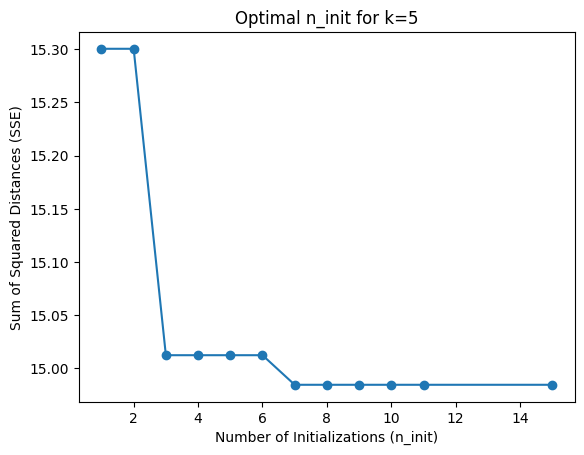

In [13]:
k_best = 5  # 
n_init_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15]

sse_n_init = []
for n_init in n_init_values:
    km = KMeans(n_clusters=k_best, n_init=n_init, random_state=10)
    km.fit(num_df)
    sse_n_init.append(km.inertia_)

# Plot SSE for different n_init values
plt.plot(n_init_values, sse_n_init, marker='o')
plt.xlabel('Number of Initializations (n_init)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Optimal n_init for k={}'.format(k_best))
plt.show()



Let's select k = 5 and n_init+7 based on the above results

In [14]:
# Run K-means algorithm
km5 = KMeans(n_clusters=5, n_init=7, random_state=0)
yp5 = km5.fit_predict(num_df)
yp5

array([2, 4, 1, 2, 4, 4, 1, 3, 3, 1, 4, 4, 1, 4, 4, 3, 1, 2, 1, 1, 4, 1,
       4, 3, 4, 2, 2, 1, 2, 3, 1, 2, 2, 4, 1, 4, 2, 2, 2, 4, 2, 4, 4, 4,
       3, 1, 1, 1, 4, 2, 2, 4, 1, 3, 3, 1, 2, 4, 3, 2, 3, 1, 1, 2, 2, 1,
       2, 4, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 4, 4, 2,
       2, 1, 4, 0, 4, 2, 2, 4, 4, 2, 0, 2, 4, 4, 4, 1, 4, 1, 2, 1, 1, 1,
       3, 3, 2, 2, 3, 1, 2, 4, 1, 1, 1, 4, 4, 3, 4, 1, 2, 1, 1, 2, 4, 4,
       2, 0, 4, 4, 1, 1, 4, 3, 1, 1, 2, 1, 3, 3, 1, 2, 4, 2, 2, 1, 4, 4,
       1, 2, 4, 3, 3, 3, 4, 1, 1, 1, 4, 2, 2])

In [15]:
df['cluster']=yp5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
 10  cluster     167 non-null    int32  
dtypes: float64(9), int32(1), object(1)
memory usage: 13.8+ KB


In [16]:
for cluster in df['cluster'].unique():
    countries_in_cluster = df[df['cluster'] == cluster]['country'].tolist()
    print(f"Cluster {cluster}: {', '.join(countries_in_cluster)}")

Cluster 2: Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia
Cluster 4: Albania, Antigua and Barbuda, Argentina, Bahamas, Bahrain, Barbados, Belarus, Bosnia and Herzegovina, Brazil, Bulgaria, Chile, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, El Salvador, Estonia, Georgia, Hungary, Latvia, Lebanon, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Montenegro, Panama, Poland, Portugal, Romania, Serbia, Seychelles, Slovak Republic, Slovenia, South Korea, Thailand, Tunisia, Turkey, Ukraine, Uruguay, Vietnam
Cluster 1: Algeria, Armenia, Azerbaijan, Bangladesh, Belize, Bhutan,